In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-26 21:26:05.070660: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 21:26:05.150436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 21:26:06.359358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Desagregações- RJ_Reconstrucao_Siluriformes_2024_08_20.xlsx')
df_Bagre_art = pd.DataFrame(df[['Ano','Bagre_art']])

dados = df_Bagre_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1965,1967,1968,1969,1970,1972,1973,1974,1975,1990,1991,1992,1993,1994,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Bagre_art'].values
dados.head()

,Ano,Bagre_art
12,1962,586.218101
13,1963,686.736549
14,1964,702.534170
16,1966,554.977125
21,1971,463.325745


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [11]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=80, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/80


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9456
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9558 
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8115 
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6915 
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6313 
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5216 
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4940 
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4727 
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4855 
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4045 
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4066 
Epoch 12/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3328 
Epoch 13/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3901 
Epoch 14/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3715 
Epoch 15/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4168 
Epoch 16/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Previsões dos dados ausentes: [[653.0485 ]
 [646.2583 ]
 [639.465  ]
 [632.6717 ]
 [625.87836]
 [619.085  ]
 [612.2916 ]
 [605.4983 ]
 [598.7049 ]
 [591.9232 ]
 [585.14484]
 [578.3502 ]
 [551.1378 ]
 [537.5316 ]
 [530.7285 ]
 [523.9254 ]
 [517.1223 ]
 [503.58112]
 [496.81195]
 [490.04834]
 [483.2846 ]
 [391.89667]
 [351.82108]
 [302.52716]
 [239.2434 ]
 [162.75647]
 [ 47.15776]]


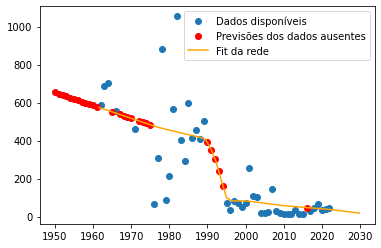

In [12]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

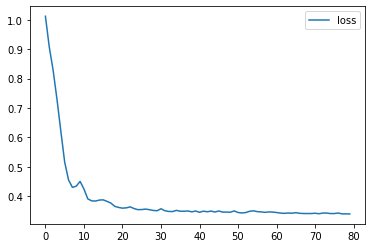

In [13]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [15]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Bagre_art':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre/Interpolações e Extrapolações Bagre_art.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Ano,Bagre_art
0,1950,653.048523
1,1951,646.258301
2,1952,639.465027
3,1953,632.671692
4,1954,625.878357
...,...,...
62,2012,53.900085
63,2013,52.182251
64,2014,50.497620
65,2015,48.813034
